### About Dataset
### Context
#### This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
#### You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
#### Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
#### You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Mall Customer Segmentation Data - Exploratory Data Analysis and Clustering using KMeans CLUSTERING Algortihm

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Loading dataset

In [2]:
df = pd.read_csv('Mall_Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

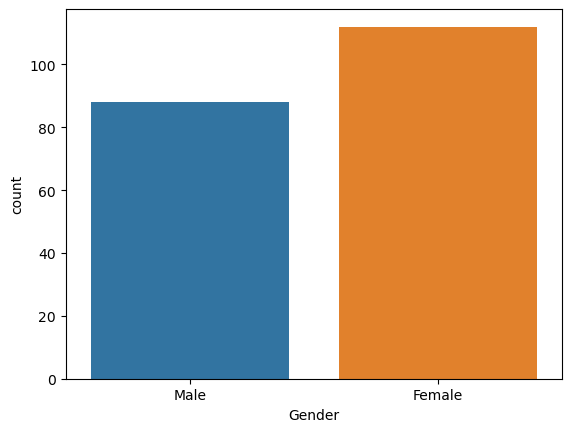

In [8]:
sns.countplot(x=df['Gender'])

In [9]:
#Encoding
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [11]:
x = df.iloc[:,[3,4]].values

In [12]:
wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Choosing the Number of Clusters

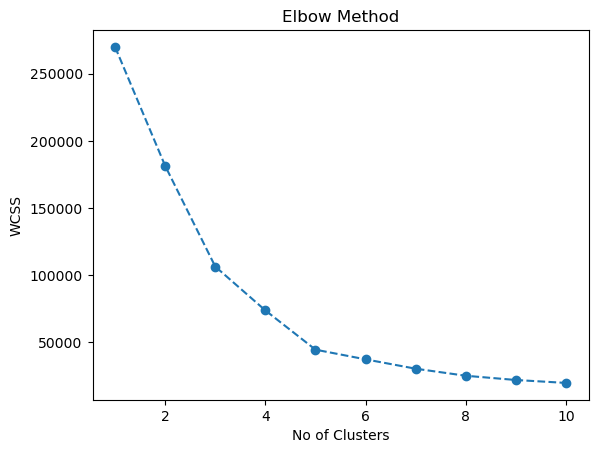

In [13]:
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [15]:
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,3
2,3,1,20,16,6,2
3,4,1,23,16,77,3
4,5,1,31,17,40,2


### Visualising the Clusters

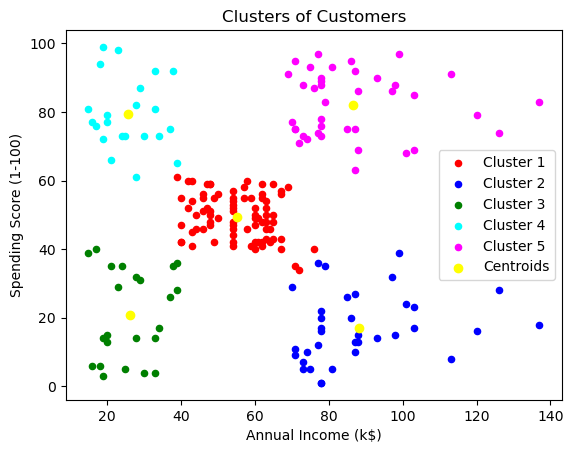

In [16]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Cluster Analysis

#### Cluster 1: Average Income, Average Spending Score
#### Cluster 2: High Income, Low Spending Score
#### Cluster 3: Low Income, Low Spending Score
#### Cluster 4: Low Income, High Spending Score
#### Cluster 5: High Income, High Spending Score

In [18]:
oneData = df.iloc[y == 0, :]
twoData = df.iloc[y == 1, :]
threeData = df.iloc[y == 2, :]
fourData = df.iloc[y == 3, :]
fiveData = df.iloc[y == 4, :]

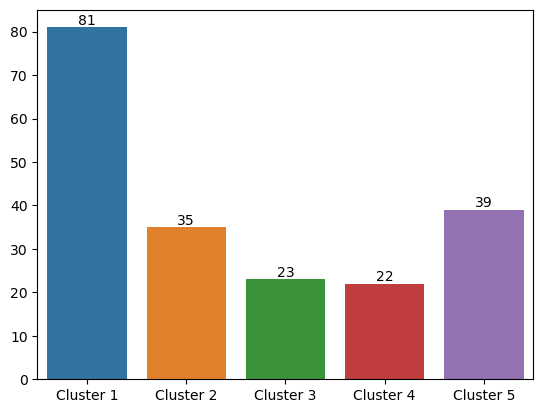

In [19]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()


### Conclusion
#### Based on the analysis, these are the final observations from the dataset for each cluster:

#### Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. They should be sent regular updates and promotional offers so as to keep their interest.
#### Cluster 2 has high income but they do not shop as much. These people should be targeted since they have the spending capactiy. Their past data should be analysed so as to send them specific promotional messages to get their interest back.
#### Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending.
#### Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. They should be sent more discount based coupons.
#### Cluster 5 is the best group since they have a high income and a high spending score as well. They should be sent regular updates and promotions.